<a href="https://colab.research.google.com/github/mohammedEhab2235/Netflix_Customers/blob/main/Netflix_customer_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
!pip install plotly
import plotly.express as px

In [ ]:
df=pd.read_csv('Netflix Userbase.csv')
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [ ]:
df.duplicated().sum()


0

In [ ]:
df.isnull().sum()

,0
User ID,0
Subscription Type,0
Monthly Revenue,0
Join Date,0
Last Payment Date,0
Country,0
Age,0
Gender,0
Device,0
Plan Duration,0


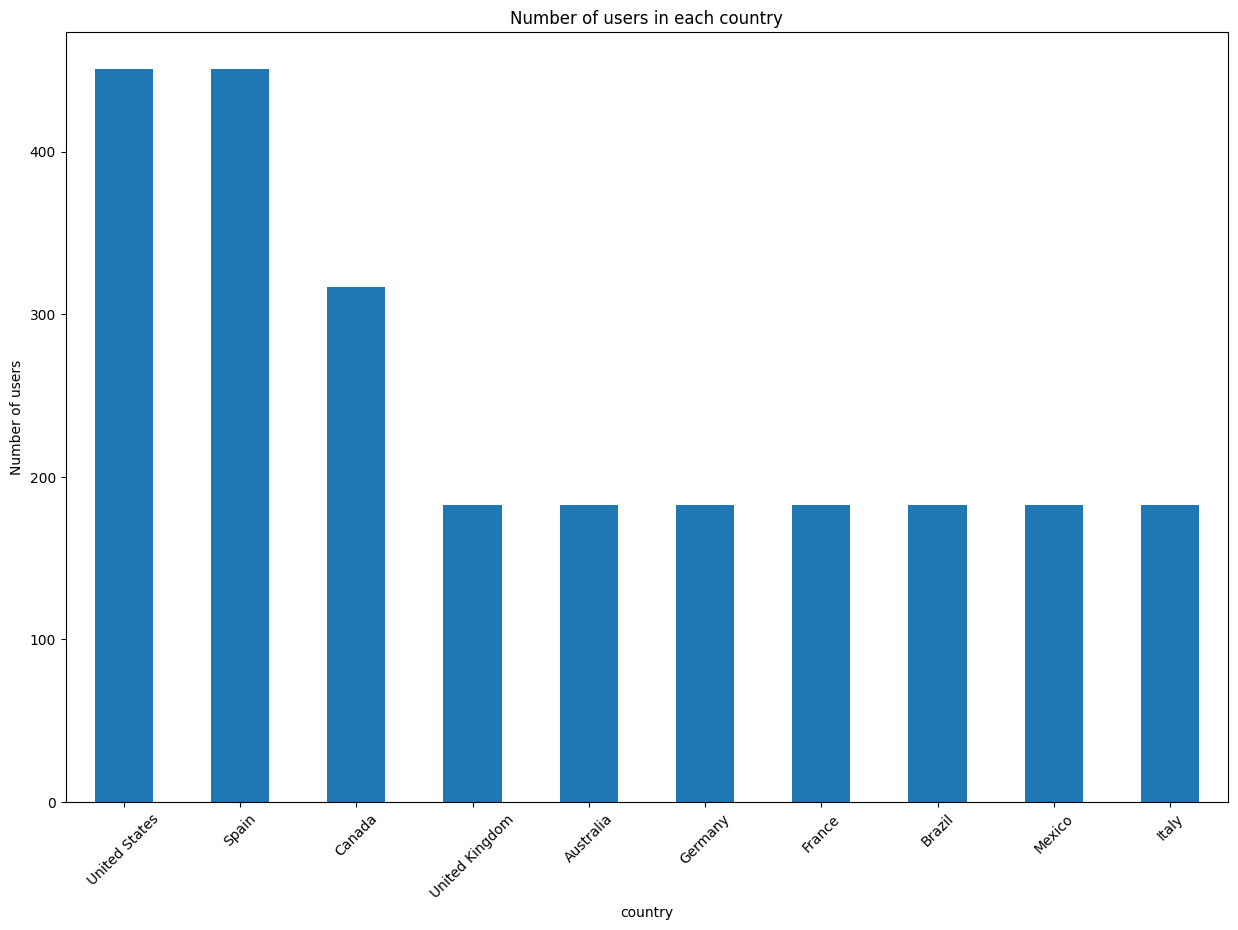

In [ ]:
plt.figure(figsize=(15,10))
df['Country'].value_counts().plot(kind='bar')
plt.title('Number of users in each country')
plt.xlabel('country')
plt.ylabel('Number of users')
plt.xticks(rotation=45)
plt.show()
#

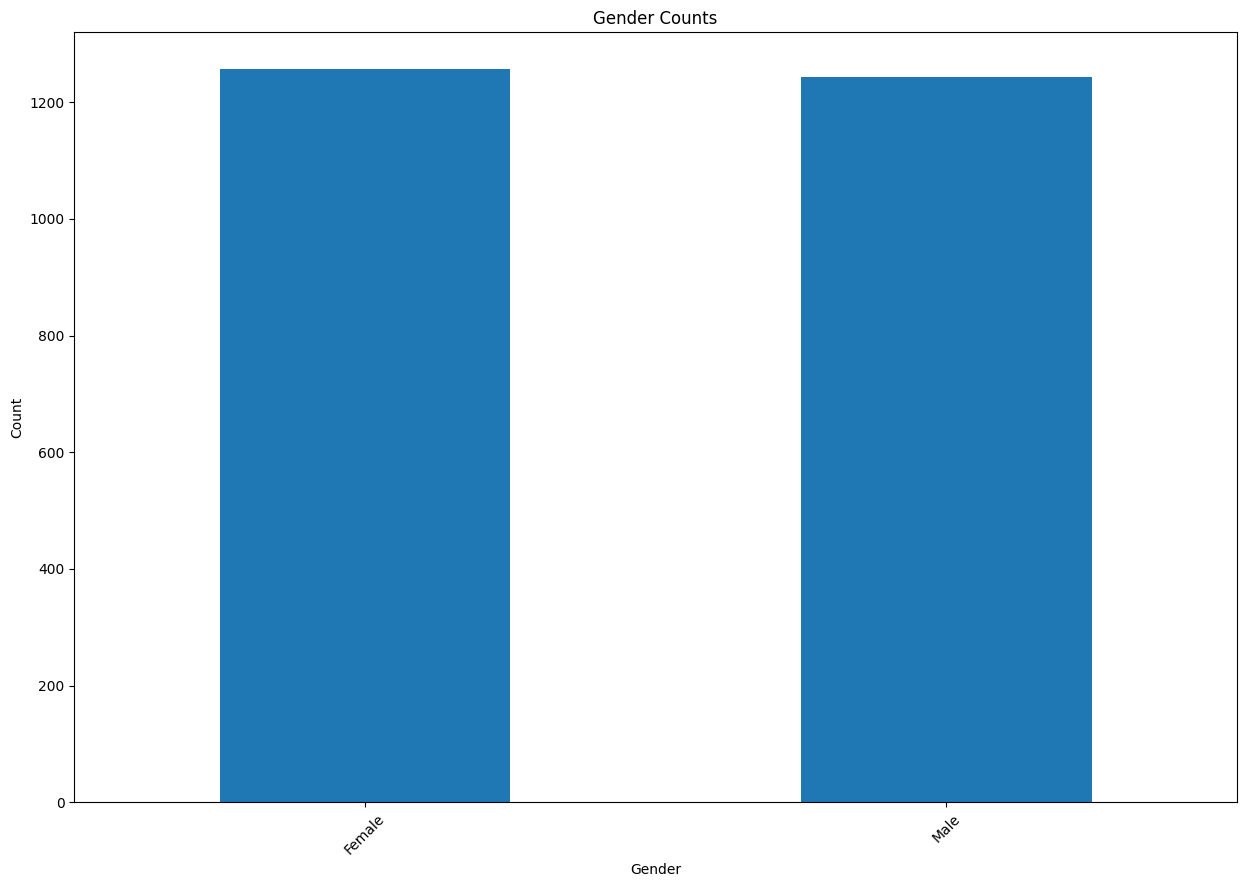

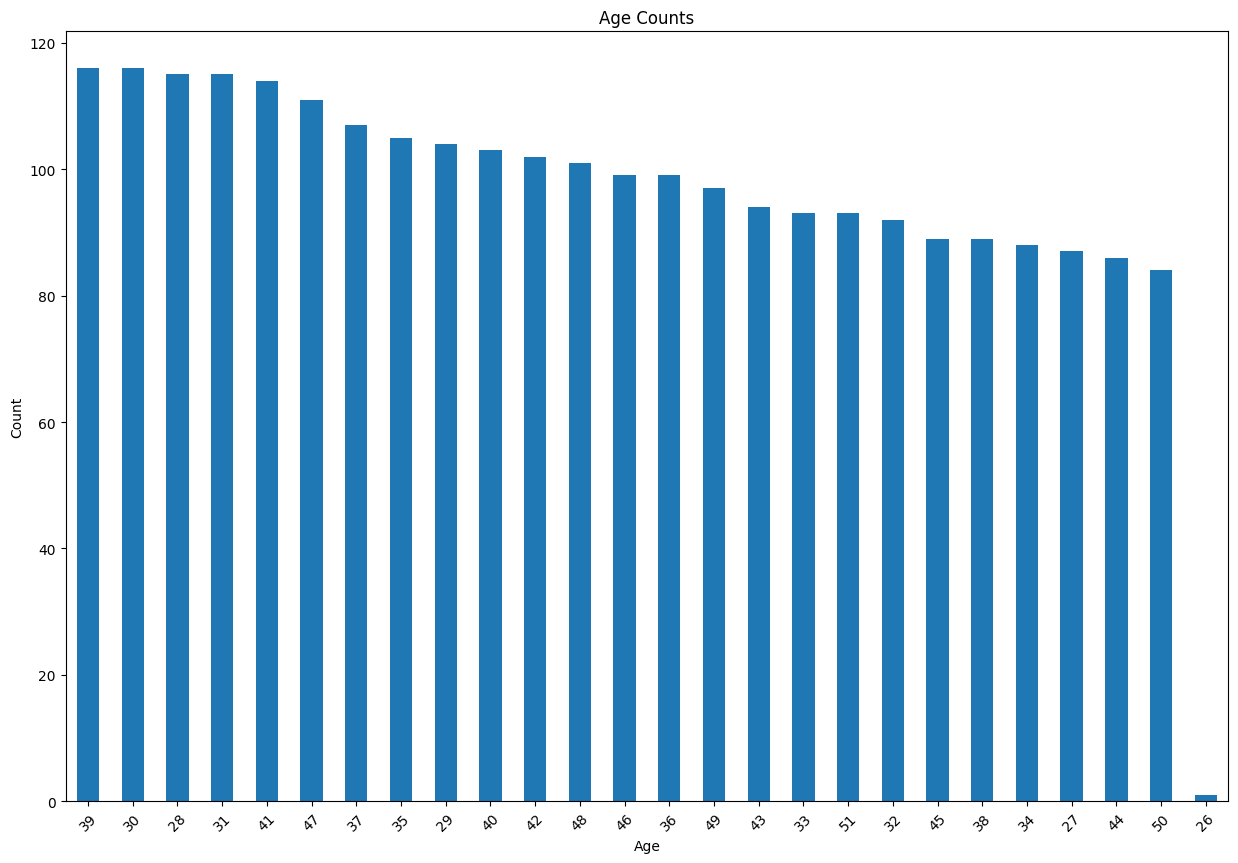

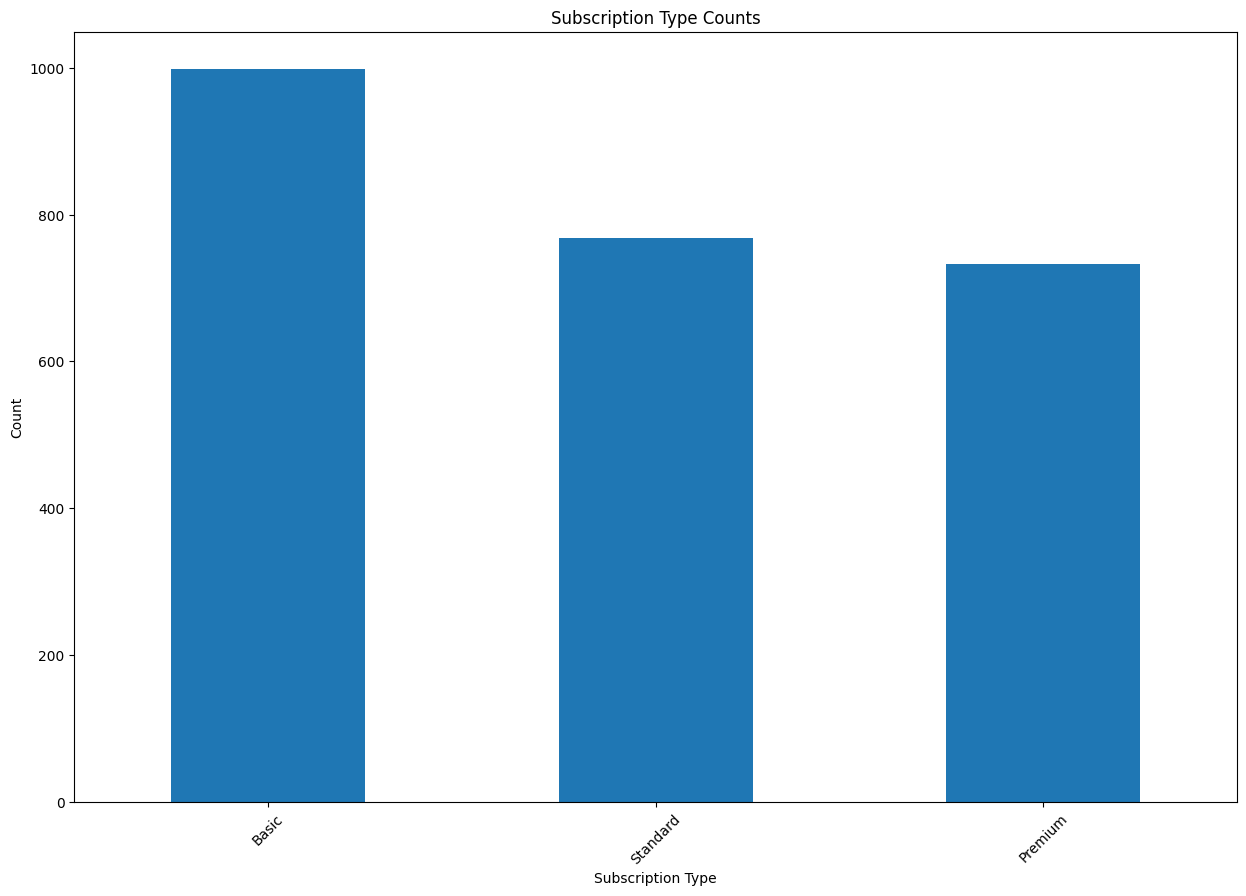

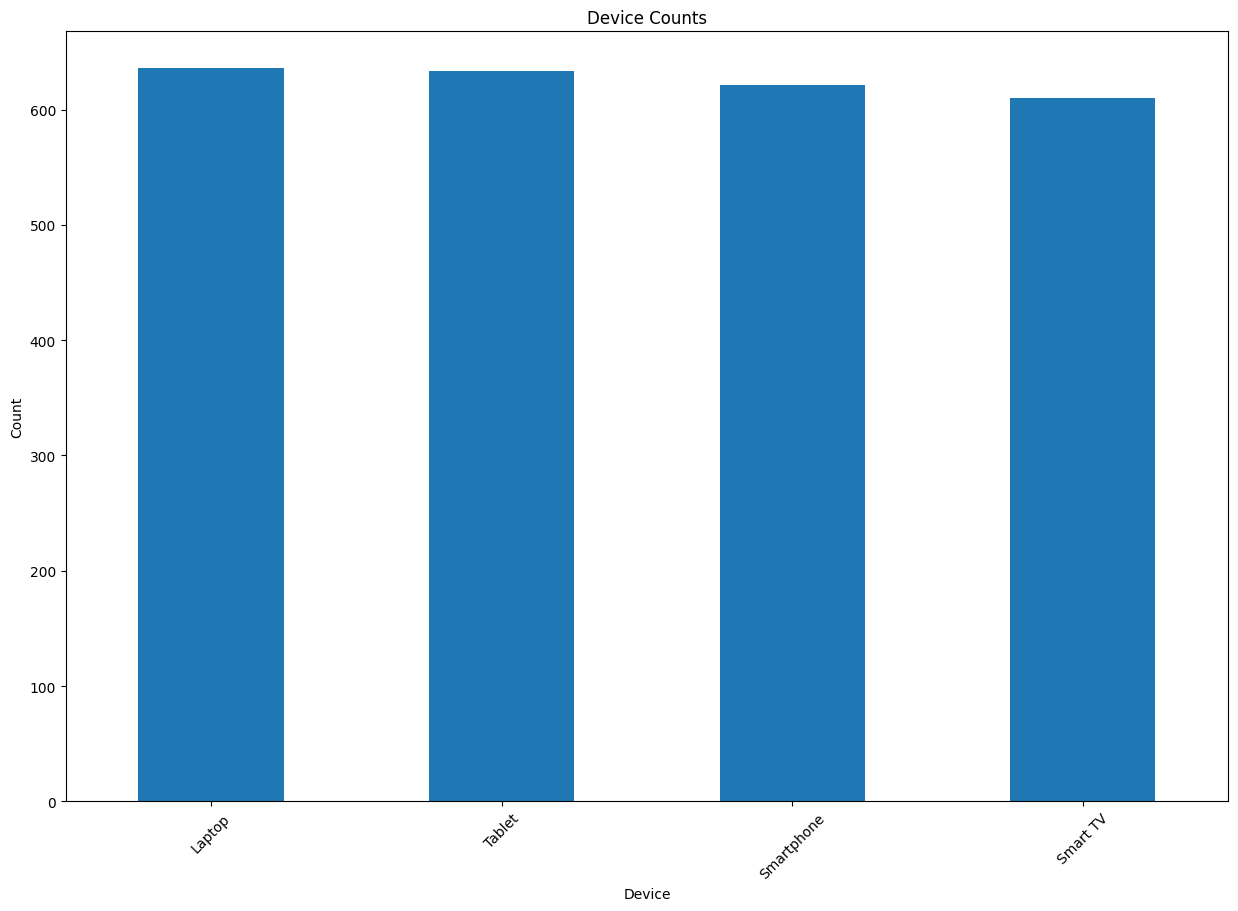

In [ ]:
column_titles={
    'Gender':'Gender Counts',
    'Age':'Age Counts',
    'Subscription Type':'Subscription Type Counts',
    'Device':'Device Counts'
}

for column,title in column_titles.items():
    plt.figure(figsize=(15,10))
    df[column].value_counts().plot(kind='bar')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
#

In [ ]:


fig = px.choropleth(df,
                    locations='Country',
                    locationmode='country names',
                    color='Country',
                    title='Netflix Users per Country')
fig.show()


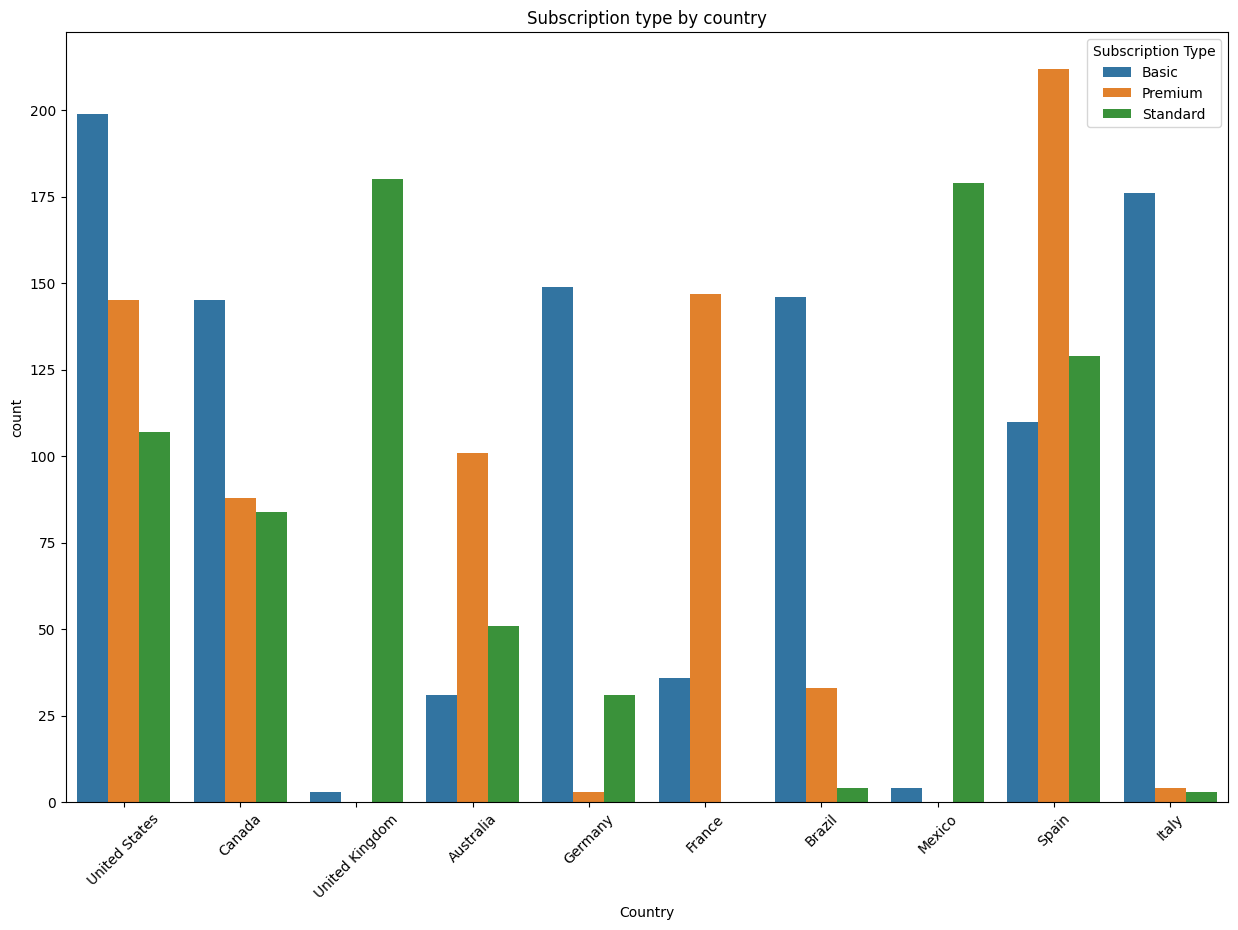

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='Country',hue='Subscription Type',data=df)
plt.title('Subscription type by country')
plt.xticks(rotation=45)
plt.show()
#

In [ ]:
subs_per_country=df.pivot_table(index='Country',columns='Subscription Type',values='User ID',aggfunc='count',fill_value=0)
subs_per_country


Subscription Type,Basic,Premium,Standard
Country,,,
Australia,31,101,51
Brazil,146,33,4
Canada,145,88,84
France,36,147,0
Germany,149,3,31
Italy,176,4,3
Mexico,4,0,179
Spain,110,212,129
United Kingdom,3,0,180


In [ ]:
subs_per_country['Total']=subs_per_country.sum(axis=1)
subs_per_country

Subscription Type,Basic,Premium,Standard,Total
Country,,,,
Australia,31,101,51,183
Brazil,146,33,4,183
Canada,145,88,84,317
France,36,147,0,183
Germany,149,3,31,183
Italy,176,4,3,183
Mexico,4,0,179,183
Spain,110,212,129,451
United Kingdom,3,0,180,183


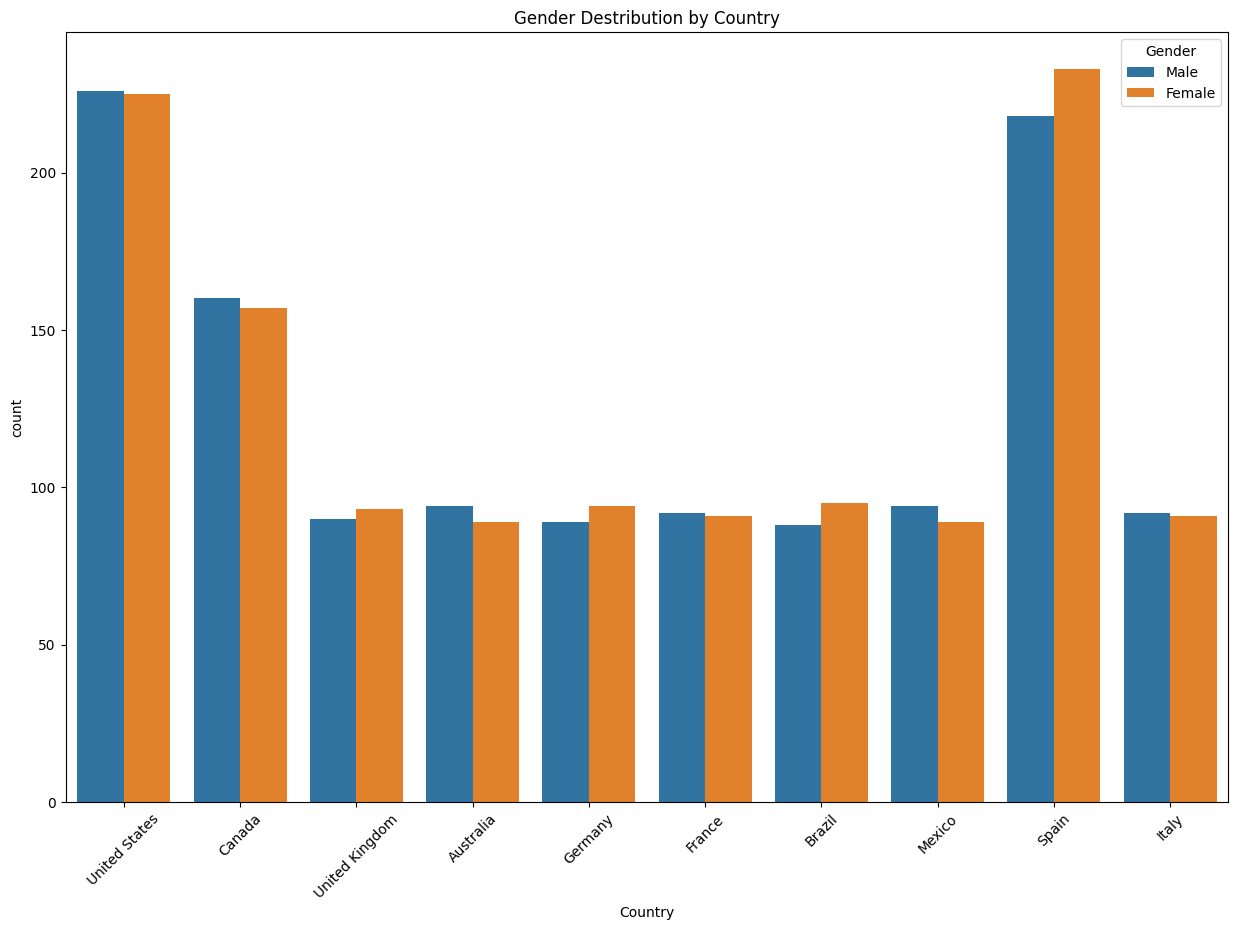

In [ ]:
 plt.figure(figsize=(15,10))
sns.countplot(x='Country',hue='Gender',data=df)
plt.title('Gender Destribution by Country')
plt.xticks(rotation=45)
plt.show()

In [ ]:
gender_per_country=df.pivot_table(index='Country',columns='Gender',values='User ID',aggfunc='count',fill_value=0)
gender_per_country


Gender,Female,Male
Country,,
Australia,89,94
Brazil,95,88
Canada,157,160
France,91,92
Germany,94,89
Italy,91,92
Mexico,89,94
Spain,233,218
United Kingdom,93,90


In [ ]:
gender_per_country['Total']=gender_per_country.sum(axis=1)
gender_per_country
#

Gender,Female,Male,Total
Country,,,
Australia,89,94,183
Brazil,95,88,183
Canada,157,160,317
France,91,92,183
Germany,94,89,183
Italy,91,92,183
Mexico,89,94,183
Spain,233,218,451
United Kingdom,93,90,183


In [ ]:
subs_by_country_gender=df.pivot_table(index=['Country','Gender'],columns='Subscription Type',values='User ID',aggfunc='count',fill_value=0)
subs_by_country_gender
#

Subscription Type      Basic  Premium  Standard
Country        Gender                          
Australia      Female     16       45        28
               Male       15       56        23
Brazil         Female     78       16         1
               Male       68       17         3
Canada         Female     68       40        49
               Male       77       48        35
France         Female     17       74         0
               Male       19       73         0
Germany        Female     80        1        13
               Male       69        2        18
Italy          Female     86        3         2
               Male       90        1         1
Mexico         Female      2        0        87
               Male        2        0        92
Spain          Female     60      113        60
               Male       50       99        69
United Kingdom Female      2        0        91
               Male        1        0        89
United States  Female    103       72        50
               Male       96       73        57

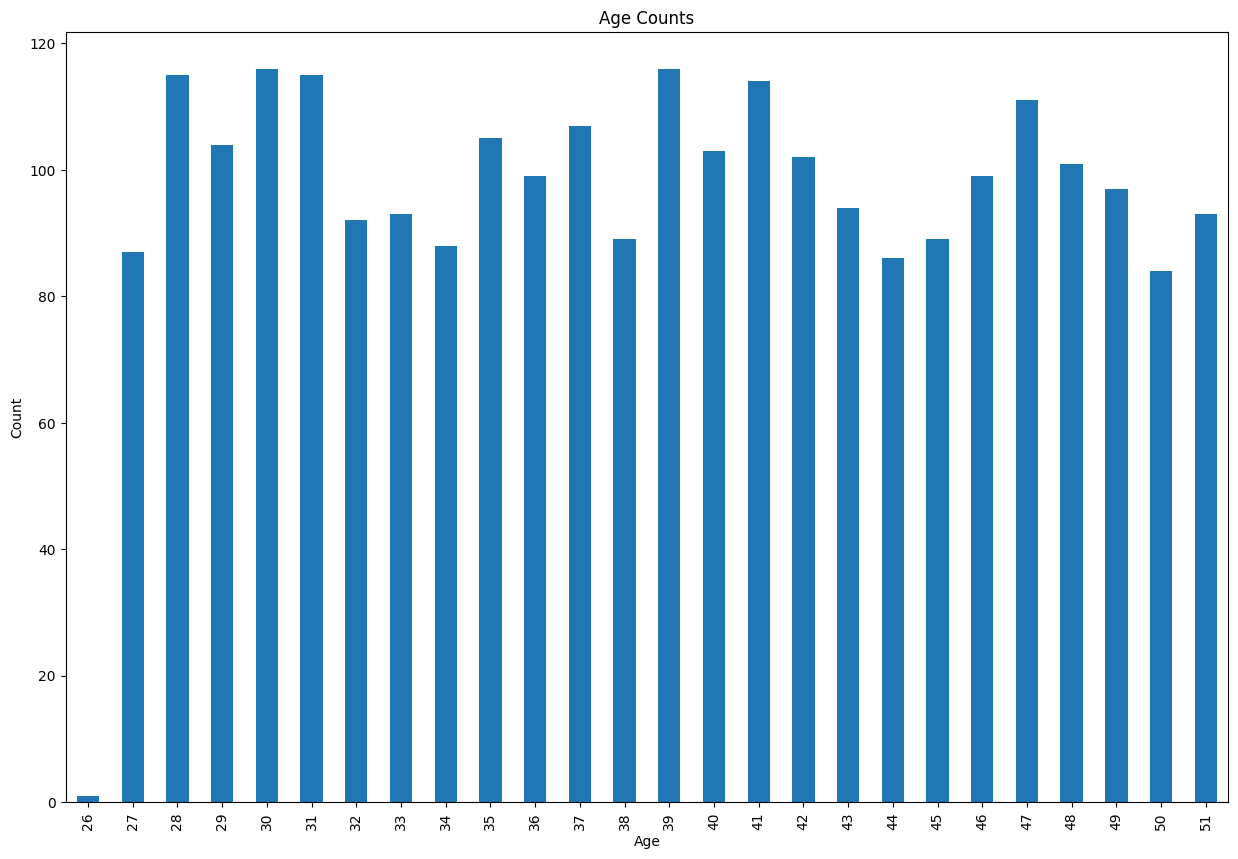

In [ ]:
plt.figure(figsize=(15,10))
df["Age"].value_counts().sort_index().plot(kind='bar')
plt.title('Age Counts')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [ ]:
df['Join Date']=pd.to_datetime(df['Join Date'],format='%d-%m-%y')
df['Last Payment Date']=pd.to_datetime(df['Last Payment Date'],format='%d-%m-%y')
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration,Duration Months,Revenu,LTV
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,629,21,6290,210
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,774,26,11610,390
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4,1428,48
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,262,9,3144,108
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,174,6,1740,60


In [ ]:
df['Duration']=(df['Last Payment Date']-df['Join Date']).dt.days
df['Duration Months']=df['Duration'].apply(lambda x:math.ceil(x/30))
#

In [ ]:
df['LTV']=df['Duration Months']*df['Monthly Revenue']